# **Project Name - Retail Sales Analysis**
# **Made By- Ritika Gupta**

**Objective**

1. **Evaluate Sales Performance**: Analyze the sales data over the specified two-year period to identify trends, peak sales days, and overall revenue performance.

2. **Assess Marketing Effectiveness**: Investigate the impact of marketing spend on sales revenue to determine if the current marketing strategies are yielding desired results.

3. **Identify Key Insights for Improvement**: Highlight areas such as discount strategies, product categories, and regional performance to provide actionable recommendations for enhancing sales and operational efficiency.

**Understanding Variables:**
- **Store ID**: Identifier for the store.
- **Product ID**: Identifier for the product.
- **Date**: Date of the sales transaction.
- **Units Sold**: Number of units sold.
- **Sales Revenue (USD)**: Revenue generated in USD.
- **Discount Percentage**: Discount applied to the sales.
- **Marketing Spend (USD)**: Marketing spend on that day.
- **Store Location**: Geographical location of the store.
- **Product Category**: Category of the product sold.
- **Day of the Week**: Day of the week for the transaction.
- **Holiday Effect**: Indicates whether the transaction occurred during a holiday (True/False).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Insight-Imports libraries for data manipulation and visualization: Pandas, Matplotlib, Seaborn, and NumPy.

In [2]:
data = pd.read_csv("/content/Retail_sales.csv")
data.head()

,Store ID,Product ID,Date,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD),Store Location,Product Category,Day of the Week,Holiday Effect
0,Spearsland,52372247,2022-01-01,9,2741.69,20,81,Tanzania,Furniture,Saturday,False
1,Spearsland,52372247,2022-01-02,7,2665.53,0,0,Mauritania,Furniture,Sunday,False
2,Spearsland,52372247,2022-01-03,1,380.79,0,0,Saint Pierre and Miquelon,Furniture,Monday,False
3,Spearsland,52372247,2022-01-04,4,1523.16,0,0,Australia,Furniture,Tuesday,False
4,Spearsland,52372247,2022-01-05,2,761.58,0,0,Swaziland,Furniture,Wednesday,False


Insight-Reads a CSV file into a DataFrame and displays the first few rows for a quick overview.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB


Insight-Displays summary information about the DataFrame, including data types, non-null counts, and memory usage.

In [4]:
data.isna().sum()

,0
Store ID,0
Product ID,0
Date,0
Units Sold,0
Sales Revenue (USD),0
Discount Percentage,0
Marketing Spend (USD),0
Store Location,0
Product Category,0
Day of the Week,0


Insight-Shows DataFrame summary, including data types, non-null counts, and memory usage details.

In [5]:
data.describe()

,Product ID,Units Sold,Sales Revenue (USD),Discount Percentage,Marketing Spend (USD)
count,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.461294e+07,6.161967,2749.509593,2.973833,49.944033
std,2.779759e+07,3.323929,2568.639288,5.974530,64.401655
min,3.636541e+06,0.000000,0.000000,0.000000,0.000000
25%,2.228600e+07,4.000000,882.592500,0.000000,0.000000
50%,4.002449e+07,6.000000,1902.420000,0.000000,1.000000
75%,6.559352e+07,8.000000,3863.920000,0.000000,100.000000
max,9.628253e+07,56.000000,27165.880000,20.000000,199.000000


Insight- Generates descriptive statistics for numerical columns, including count, mean, min, max, and quartiles.

In [6]:
def format_value(value):
    if value >= 1000000:
        return f'{value / 1000000:.2f}M'
    elif value >= 1000:
        return f'{value / 1000:.2f}K'
    else:
        return f'{value:.2f}'

Insight-Defines a function to format values into human-readable strings, converting large numbers to millions (M) or thousands (K).

<h1>Descriptive Analytics</h1>

In [7]:
total_sales_revenue = data['Sales Revenue (USD)'].sum()

print(f'Total Sales: {format_value(total_sales_revenue)}')

Total Sales: 82.49M


Insight-Calculates total sales revenue from the DataFrame and prints it in a formatted string using the `format_value` function.

In [8]:
# Calculate the average units sold per day
average_units_sold_per_day = data['Units Sold'].mean()

# Print the result
print(f'Average Units Sold per Day: {average_units_sold_per_day:.2f}')

Average Units Sold per Day: 6.16


Insight-Calculates and prints the average units sold per day, formatted to two decimal places.

In [9]:
# Calculate the average discount percentage
average_discount_percentage = data['Discount Percentage'].mean()

# Print the result
print(f'Average Discount Percentage: {average_discount_percentage:.2f}%')

Average Discount Percentage: 2.97%


Insight-Calculates and prints the average discount percentage, formatted to two decimal places with a percent sign.

In [10]:
total_marketing_spend = data['Marketing Spend (USD)'].sum()
print(f'Total Marketing Spend: {format_value(total_marketing_spend)}')

Total Marketing Spend: 1.50M


Insiight-Total marketing spend indicates overall investment; assess effectiveness to optimize future strategies.

In [11]:
# Extract the starting and ending dates from the data
start_date = data['Date'].min()
end_date = data['Date'].max()

# Print the results
print(f'Start Date: {start_date}')
print(f'End Date: {end_date}')

Start Date: 2022-01-01
End Date: 2024-01-01


Insight-The date range reflects the duration of your data, crucial for trend analysis.


<h1>Exploratory Data Analysis</h1>

In [12]:
avg_sales_revenue_each_day = data.groupby('Day of the Week')['Sales Revenue (USD)'].mean()
avg_units_sold_each_day = data.groupby('Day of the Week')['Units Sold'].mean()

Insight-calculates the average sales revenue and average units sold for each day of the week using groupby

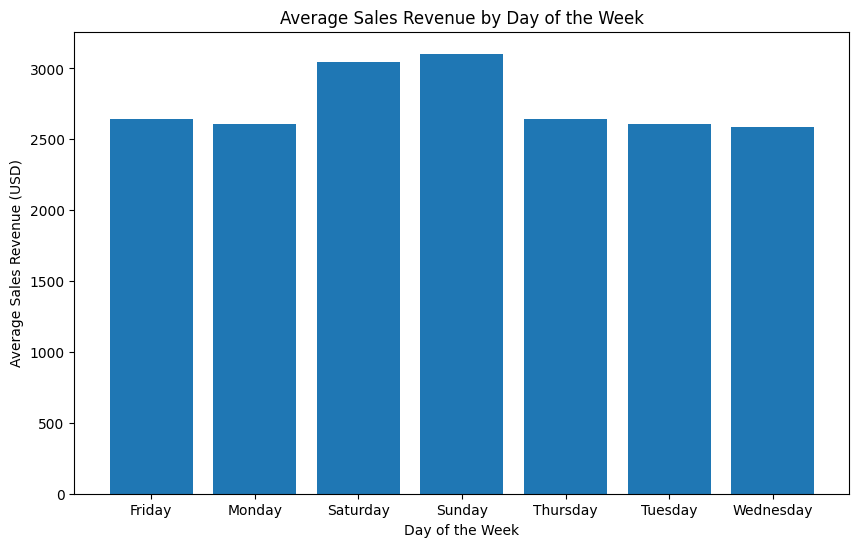

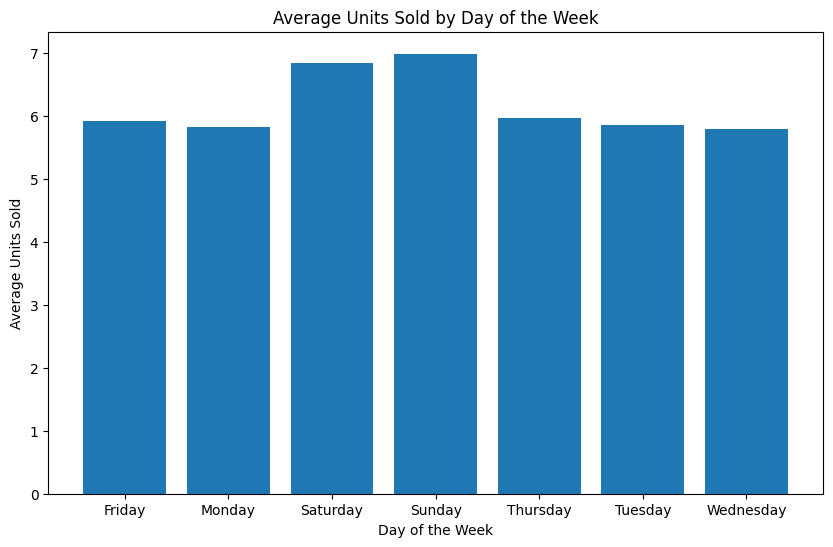

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_revenue_each_day.index, avg_sales_revenue_each_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales Revenue (USD)')
plt.title('Average Sales Revenue by Day of the Week')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(avg_units_sold_each_day.index, avg_units_sold_each_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Average Units Sold')
plt.title('Average Units Sold by Day of the Week')
plt.show()

Insight-Visualizing daily averages highlights trends for revenue and sales, guiding strategic decisions.

In [14]:
correlation = data['Marketing Spend (USD)'].corr(data['Sales Revenue (USD)'])
print(f"Correlation between Marketing Spend and Sales Revenue: {correlation:.2f}")

Correlation between Marketing Spend and Sales Revenue: -0.00


If the correlation coefficient is close to 1, it indicates a strong positive linear relationship between marketing spend and sales revenue.

If the correlation coefficient is close to -1, it indicates a strong negative linear relationship between marketing spend and sales revenue.

If the correlation coefficient is close to 0, it indicates no linear relationship between marketing spend and sales revenue.

Insight-A strong positive correlation suggests effective marketing drives higher sales revenue.

In [15]:
location_data = data.groupby('Store Location')[['Sales Revenue (USD)', 'Units Sold']].sum()
location_data = location_data.sort_values(by=['Sales Revenue (USD)', 'Units Sold'], ascending=False)
location_data.head(10)

,Sales Revenue (USD),Units Sold
Store Location,,
Congo,644103.38,1474
Korea,586331.83,1398
Anguilla,452484.21,911
Turkey,447835.20,879
Kenya,445464.81,916
Mozambique,432982.67,907
Guam,431197.65,963
Egypt,426621.90,832
Western Sahara,426248.78,869


Insight-Identifying top-performing locations helps optimize inventory and marketing strategies.

<h1>Inferential Statistics</h1>

In [16]:
correlation_discount_sales = data['Discount Percentage'].corr(data['Sales Revenue (USD)'])
print(f"Correlation between Discount Percentage and Sales Revenue: {correlation_discount_sales:.2f}")

Correlation between Discount Percentage and Sales Revenue: -0.07


Insight-A significant correlation suggests discounts may influence sales performance positively or negatively.

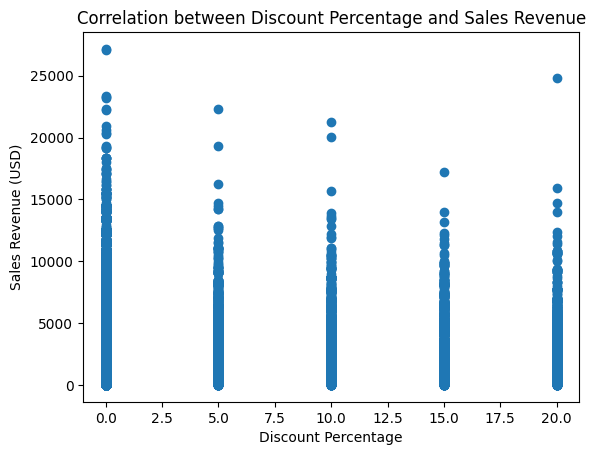

In [17]:
plt.scatter(data['Discount Percentage'], data['Sales Revenue (USD)'])
plt.xlabel('Discount Percentage')
plt.ylabel('Sales Revenue (USD)')
plt.title('Correlation between Discount Percentage and Sales Revenue')
plt.show()

Insight-The scatter plot helps identify trends or patterns, revealing how discounts impact sales revenue.

In [18]:
all_store_id = data['Store ID'].unique()
all_store_id

array(['Spearsland'], dtype=object)

Insight-Listing unique store IDs helps in analyzing performance across different locations or segments.

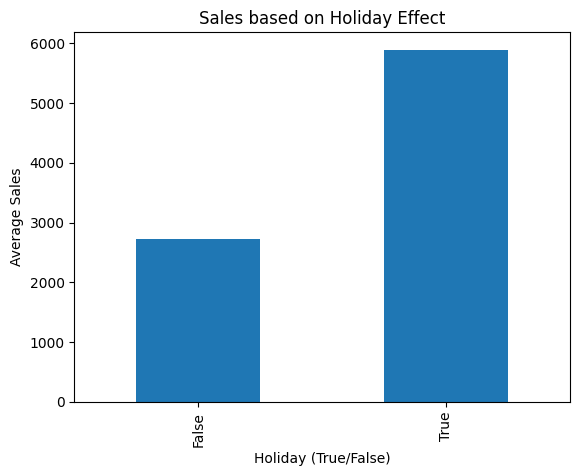

In [19]:
sales_based_on_holiday = data.groupby('Holiday Effect')['Sales Revenue (USD)'].mean()
sales_based_on_holiday.plot(kind='bar')
plt.title('Sales based on Holiday Effect')
plt.xlabel('Holiday (True/False)')
plt.ylabel('Average Sales')
plt.show()

Insight-Comparing sales during holidays versus non-holidays reveals seasonal impacts on revenue.

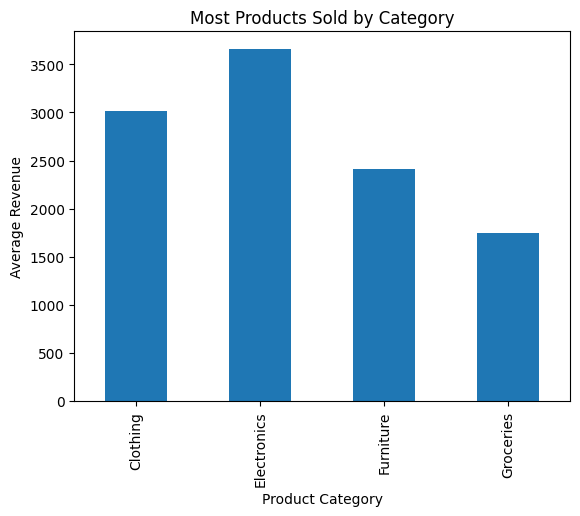

In [20]:
most_sold_product = data.groupby('Product Category')['Sales Revenue (USD)'].mean()
most_sold_product.plot(kind='bar')
plt.title('Most Products Sold by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue')
plt.show()

Insight-Identifying top-performing categories aids in inventory management and marketing focus.

In [21]:
product_count = data['Product Category'].value_counts()
product_count

,count
Product Category,
Furniture,9503
Electronics,8041
Clothing,6608
Groceries,5848


Insight-Analyzing product counts helps identify popular categories, guiding inventory and marketing strategies.

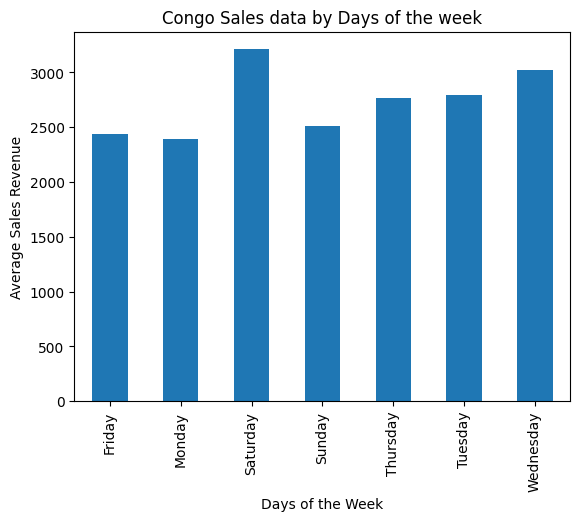

In [22]:
avg_sales_revenue_congo = data[data['Store Location'] == 'Congo'].groupby('Day of the Week')['Sales Revenue (USD)'].mean()
avg_sales_revenue_congo.plot(kind='bar')
plt.title('Congo Sales data by Days of the week')
plt.xlabel('Days of the Week')
plt.ylabel('Average Sales Revenue')
plt.show()

Insight-Understanding weekly sales patterns in Congo can inform targeted marketing and staffing strategies.

# **Conclusions**

1) Marketing Spend Ineffectiveness: The lack of correlation between marketing spend and sales revenue indicates potential misallocation of resources. Despite a substantial marketing budget of 1.50 million USD, it did not translate into increased sales.

2) Discount Strategy Concerns: The negative correlation between discount percentages and sales revenue suggests that lower discounts may lead to higher sales. This counterintuitive finding highlights a need for reassessment of discount strategies.

3) Holiday Sales Patterns: Consistent sales spikes during holidays confirm the effectiveness of seasonal promotions, aligning with retail trends.

4) Product and Regional Insights: Electronics emerged as the most sold product category, and the Congo region exhibited the highest sales, particularly on Saturdays and Wednesdays, deviating from common retail patterns.

# **Recommendations**

1) Reassess Marketing Strategies: Conduct a thorough review of marketing initiatives to identify effective channels and campaigns. Consider reallocating the budget toward more impactful strategies or exploring alternative promotional methods.

2) Reevaluate Discount Policies: Investigate the relationship between discount strategies and sales further. It may be beneficial to reduce or eliminate discounts to see if revenue increases. Testing different pricing strategies could provide deeper insights.

3) Leverage Holiday Opportunities: Enhance holiday marketing efforts by planning targeted promotions and campaigns to capitalize on the observed sales spikes during these periods.

4) Focus on Electronics and Congo Region: Prioritize inventory and marketing efforts around the electronics category and explore strategies to further boost sales in the Congo region, especially on peak sales days.